In [3]:
import pandas as pd
import seaborn as sns

test_df = pd.read_csv("/kaggle/input/mnist-cv-test/mnist_test.csv")

train_df = pd.read_csv("/kaggle/input/mnist-cv-test/mnist_train.csv")



# EDA

In [4]:
# Check the shape of the datasets
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# Check for missing values
print("Missing values in train data:\n", train_df.isnull().sum())
print("Missing values in test data:\n", test_df.isnull().sum())

# Display the first few rows of the training data
print(train_df.head())

Train data shape: (59999, 785)
Test data shape: (9999, 785)
Missing values in train data:
 5        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.613    0
0.614    0
0.615    0
0.616    0
0.617    0
Length: 785, dtype: int64
Missing values in test data:
 7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64
   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0 

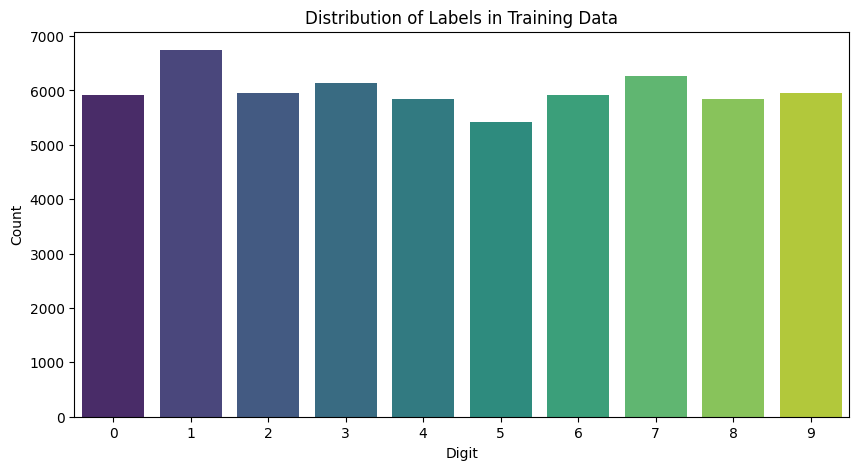

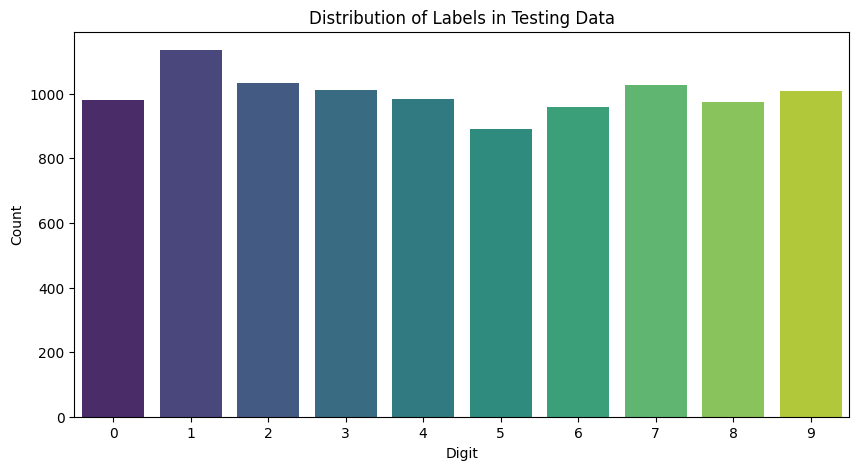

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels in the training data
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df.iloc[:, 0], palette='viridis')  # Use the 0th column as labels
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Plot the distribution of labels in the testing data
plt.figure(figsize=(10, 5))
sns.countplot(x=test_df.iloc[:, 0], palette='viridis')  # Use the 0th column as labels
plt.title("Distribution of Labels in Testing Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

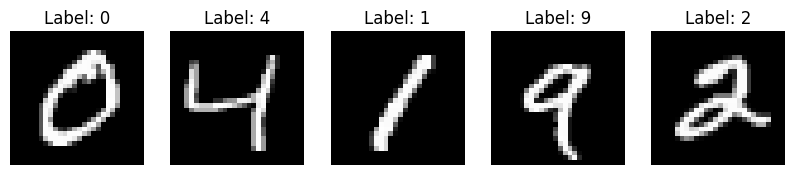

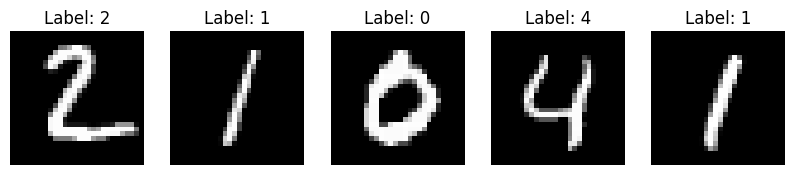

In [6]:
# Function to plot sample images
def plot_sample_images(data, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        # Reshape the flattened image to 28x28
        image = data.iloc[i, 1:].values.reshape(28, 28)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {data.iloc[i, 0]}")
        plt.axis('off')
    plt.show()

# Plot sample images from the training data
plot_sample_images(train_df)

# Plot sample images from the testing data
plot_sample_images(test_df)

In [7]:
# Check the number of samples per class in the training data
print("Training data class distribution:\n", train_df.iloc[:, 0].value_counts())

# Check the number of samples per class in the testing data
print("Testing data class distribution:\n", test_df.iloc[:, 0].value_counts())

Training data class distribution:
 5
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: count, dtype: int64
Testing data class distribution:
 7
1    1135
2    1032
7    1027
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


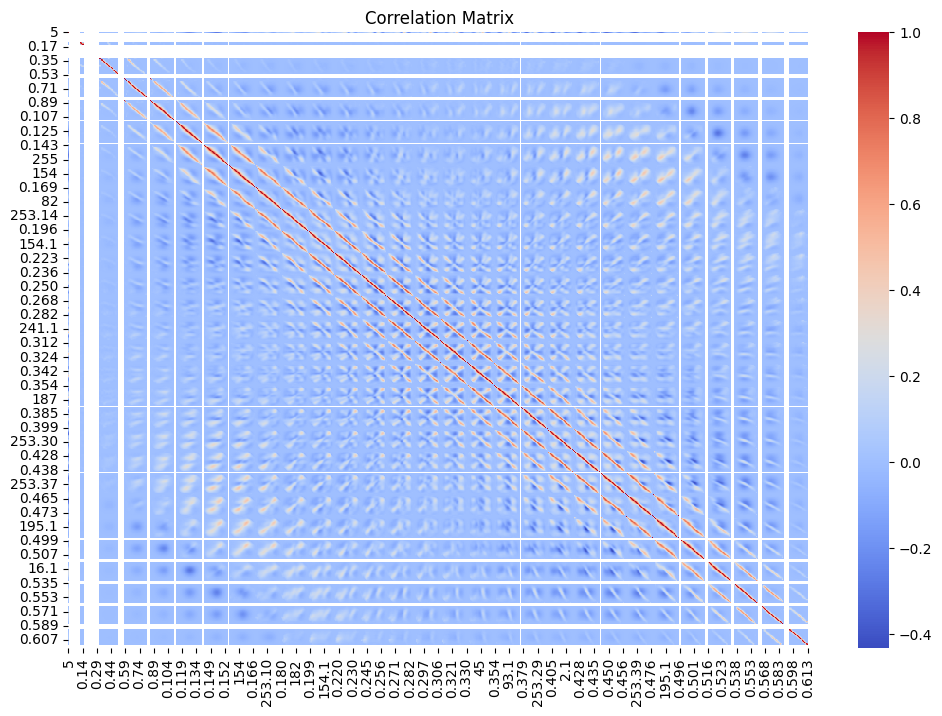

In [9]:
# Compute the correlation matrix
corr_matrix = train_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

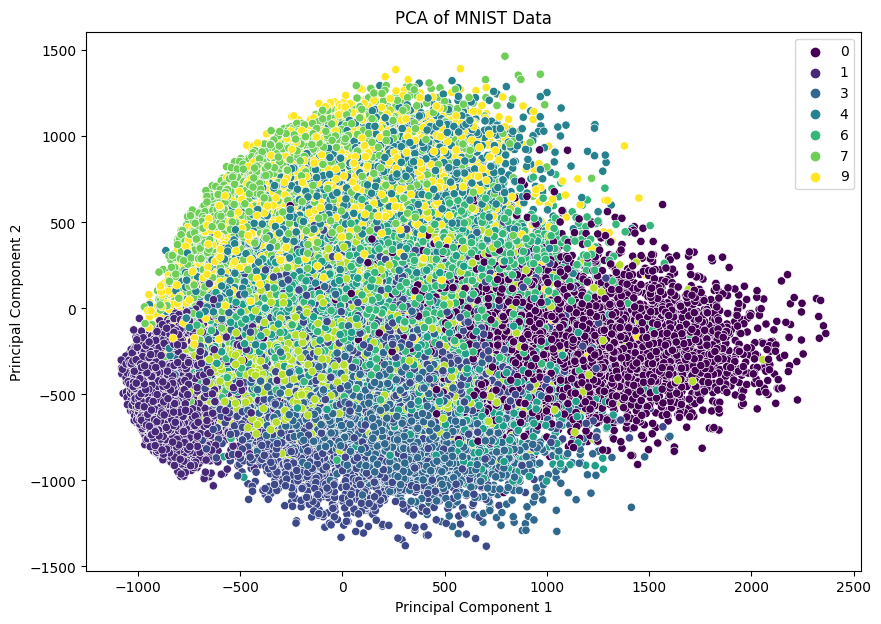

In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(train_df.iloc[:, 1:])

# Plot the reduced data
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_reduced[:, 0], y=train_reduced[:, 1], hue=train_df.iloc[:,0].values, palette='viridis')
plt.title("PCA of MNIST Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocess

100%|██████████| 9999/9999 [00:01<00:00, 6246.89it/s]


images saved to /kaggle/working/train_images.csv and /kaggle/working/test_images.csv


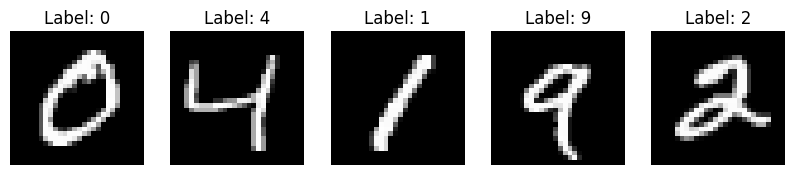

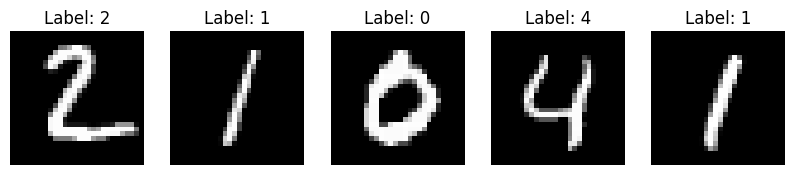

In [25]:
# Function to plot sample images
from tqdm import tqdm

def to_image(df):

    new_df = pd.DataFrame()
    images = []
    labels = []
    for i in tqdm(range(len(df))):
        # Reshape the flattened image to 28x28
        
        image = df.iloc[i, 1:].values.reshape(28, 28) #resize
        image = image/255.0 # Normalize
        
        label = df.iloc[i, 0]
        
        images.append(image)
        labels.append(label)
        
    new_df['images'] = images
    new_df['labels'] = labels

    return new_df
# Plot sample images from the training data
new_train_df = to_image(train_df)
new_test_df = to_image(test_df)

# Plot sample images from the testing data

new_test_path = "/kaggle/working/test_images.csv"
new_train_path = "/kaggle/working/train_images.csv"

new_train_df.to_csv(new_train_path)
new_test_df.to_csv(new_test_path)

print(f"images saved to {new_train_path} and {new_test_path}")

plot_sample_images(train_df)
plot_sample_images(test_df)

In [29]:
new_train_df = pd.read_csv(new_train_path)
new_test_val_df = pd.read_csv(new_test_path)

new_test_df = new_test_val_df.iloc[0:len(new_test_df)//2,:].values
new_val_df = new_test_val_df.iloc[len(new_test_df)//2:,:].values


In [ ]:

def plot_sample_images(data, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        # Reshape the flattened image to 28x28
        image = data.iloc[i, 1]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {data.iloc[i, 0]}")
        plt.axis('off')
    plt.show()

plot_sample_images(new_train_df)
plot_sample_images(new_test_df)
plot_sample_images(new_val_df)

In [30]:
new_test_df

array([[0,
        '[[0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.        ]\n [0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.        ]\n [0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.        ]\n [0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.      